19CSE305 - Machine Learning - Project
---
-----------
Computer Vision - Boneage Prediction using medical images


Done By:


*   KS Bhalaji Kharthik - CB.EN.U4CSE19026
*   Sriram S - CB.EN.U4CSE19055
*   B Sudharshan - CB.EN.U4CSE19008
*   Sreehari Krishna S - CB.EN.U4CSE19053



Required import statements

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import cv2
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Reading the contents of the original csv file into a DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/archive_6/boneage-training-dataset.csv')
df.head()
#type(df.id[0])

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


# Feature Extraction

Function to extract the features of the given image

In [ ]:
def extract_features(path):

  # using cv2 to read the image from the specified path
  original = cv2.imread(path)

  # check to verify if the path is valid and the image is correctly read
  if original is not None:

    # resizing the original image
    original = cv2.resize(original,(32,32))

    # converting the original image to gray scale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    # applying Gaussian Blur filter to reduce noise in the image
    original_blur = cv2.GaussianBlur(original_gray, (3,3), 0)

    # applying Sobel Edge Detection filter
    # for feature extraction
    sobelx = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
    sobely = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
    sobelxy = sobelx+sobely

    # converting the edge extracted image into to a numpy array
    arr = np.array(sobelxy)

    # reshaping the numpy array to 1D array
    arr = arr.reshape(32*32)

    # return the final numpy 1D array
    return arr


Extracting Image features

In [ ]:
# list to store the final data after feature extraction
final_data = []

path = '/content/drive/MyDrive/Train'

os.chdir(path)

images = os.listdir()

# for each image in the directory
for x in os.listdir():

  # get the label of that image
  label = x.split('.')[0]

  final_path = path +'/'+x

  # extract the features of that paticular image
  features = list(extract_features(final_path))

  # store the features and label in a list and append it to final_data
  data = [int(label), *features]
  final_data.append(data)

  print(data)

# at the end of the cell, final_data has all the feature of each image in the directory

[11572, 0.0, -586.0, -722.0, -534.0, -370.0, -340.0, -332.0, -268.0, -208.0, -184.0, -160.0, -136.0, -142.0, -154.0, -92.0, 28.0, 90.0, 78.0, 86.0, 130.0, 164.0, 198.0, 228.0, 240.0, 266.0, 324.0, 404.0, 518.0, 444.0, -176.0, -632.0, 0.0, -534.0, -1000.0, -1016.0, -778.0, -592.0, -524.0, -478.0, -398.0, -336.0, -312.0, -290.0, -272.0, -278.0, -274.0, -200.0, -90.0, -38.0, -44.0, -32.0, 2.0, 28.0, 74.0, 126.0, 150.0, 180.0, 230.0, 256.0, 256.0, 60.0, -608.0, -1042.0, -410.0, -558.0, -924.0, -948.0, -762.0, -584.0, -492.0, -438.0, -372.0, -326.0, -310.0, -296.0, -294.0, -304.0, -284.0, -214.0, -126.0, -60.0, -24.0, 10.0, 46.0, 80.0, 140.0, 186.0, 182.0, 194.0, 226.0, 200.0, 144.0, -52.0, -644.0, -1006.0, -396.0, -324.0, -664.0, -720.0, -560.0, -396.0, -322.0, -292.0, -262.0, -252.0, -252.0, -248.0, -260.0, -252.0, -184.0, -106.0, -52.0, 2.0, 50.0, 88.0, 122.0, 162.0, 228.0, 260.0, 236.0, 244.0, 258.0, 200.0, 160.0, 42.0, -448.0, -754.0, -168.0, -154.0, -482.0, -504.0, -328.0, -210.0, -19

Converting the list to a DataFrame

In [ ]:
# converting the final_data list to a DataFrame 
df1   = pd.DataFrame(final_data)

# renaming first column to id
df1 = df1.rename(columns={0:'id'})
df1.head()

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,11572,0.0,-586.0,-722.0,-534.0,-370.0,-340.0,-332.0,-268.0,-208.0,-184.0,-160.0,-136.0,-142.0,-154.0,-92.0,28.0,90.0,78.0,86.0,130.0,164.0,198.0,228.0,240.0,266.0,324.0,404.0,518.0,444.0,-176.0,-632.0,0.0,-534.0,-1000.0,-1016.0,-778.0,-592.0,-524.0,-478.0,...,874.0,900.0,970.0,1174.0,1618.0,2028.0,1878.0,1068.0,0.0,-1010.0,-1258.0,-894.0,-486.0,-294.0,-272.0,-250.0,-118.0,230.0,1338.0,3520.0,5648.0,5896.0,4040.0,1872.0,322.0,-1208.0,-2826.0,-4542.0,-5684.0,-4584.0,-1968.0,-266.0,170.0,264.0,360.0,572.0,962.0,1230.0,914.0,0.0
1,11576,0.0,-622.0,-408.0,64.0,218.0,248.0,316.0,318.0,216.0,112.0,100.0,154.0,164.0,128.0,108.0,88.0,56.0,16.0,-22.0,-26.0,-8.0,-2.0,-6.0,-4.0,4.0,6.0,4.0,14.0,32.0,48.0,46.0,0.0,-3150.0,-3786.0,-3686.0,-3402.0,-3430.0,-3570.0,-3670.0,...,210.0,204.0,178.0,142.0,126.0,142.0,128.0,28.0,0.0,-100.0,-118.0,-50.0,104.0,240.0,164.0,-72.0,106.0,1614.0,4470.0,6758.0,6310.0,3732.0,1592.0,158.0,-2254.0,-5272.0,-6888.0,-6078.0,-3552.0,-1178.0,-86.0,138.0,146.0,128.0,102.0,80.0,86.0,120.0,108.0,0.0
2,11574,0.0,-1742.0,-1362.0,166.0,898.0,156.0,-1032.0,-1304.0,-854.0,-526.0,-410.0,-260.0,-40.0,90.0,-32.0,-294.0,-420.0,-350.0,-190.0,-90.0,-154.0,-232.0,-178.0,-104.0,-104.0,-136.0,-200.0,-298.0,-120.0,558.0,862.0,0.0,-246.0,-1862.0,-1132.0,1098.0,2648.0,2130.0,310.0,...,560.0,642.0,744.0,814.0,1064.0,1688.0,1934.0,1054.0,0.0,-1604.0,-1536.0,-744.0,-292.0,-124.0,-46.0,276.0,1456.0,3544.0,4824.0,3712.0,1902.0,1248.0,0.0,-2992.0,-5390.0,-5302.0,-3478.0,-1630.0,-682.0,-392.0,-290.0,-254.0,-218.0,-112.0,-8.0,16.0,216.0,802.0,970.0,0.0
3,11575,0.0,-112.0,-114.0,-90.0,-102.0,-114.0,-112.0,-76.0,-24.0,-14.0,-22.0,-2.0,2.0,-34.0,-48.0,-40.0,-34.0,0.0,34.0,26.0,28.0,74.0,92.0,58.0,42.0,50.0,52.0,76.0,132.0,178.0,144.0,0.0,-196.0,-328.0,-360.0,-346.0,-350.0,-358.0,-352.0,...,824.0,858.0,902.0,946.0,994.0,1034.0,1016.0,920.0,0.0,46.0,42.0,-60.0,-154.0,-116.0,-14.0,274.0,1602.0,4510.0,6914.0,5626.0,1768.0,-416.0,-962.0,-2966.0,-5568.0,-5658.0,-3366.0,-1138.0,-174.0,-2.0,6.0,16.0,18.0,18.0,30.0,56.0,90.0,118.0,96.0,0.0
4,11602,0.0,-230.0,-382.0,-322.0,-142.0,-18.0,40.0,46.0,16.0,6.0,18.0,12.0,-22.0,-56.0,-58.0,-26.0,4.0,22.0,44.0,42.0,14.0,0.0,0.0,0.0,0.0,0.0,8.0,48.0,128.0,192.0,152.0,0.0,2482.0,1646.0,562.0,-52.0,-122.0,-90.0,-90.0,...,152.0,142.0,144.0,162.0,200.0,242.0,224.0,116.0,0.0,-82.0,-90.0,-64.0,-36.0,-10.0,0.0,0.0,192.0,1276.0,3562.0,5354.0,4676.0,2518.0,710.0,-1456.0,-4460.0,-5940.0,-4354.0,-1698.0,-264.0,24.0,44.0,42.0,14.0,0.0,8.0,32.0,72.0,114.0,100.0,0.0


Merging the original DataFrame and the new DataFrame

In [ ]:
final = df.merge(df1,on='id')
final.head()

,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1377,180,False,0.0,-1352.0,-604.0,424.0,44.0,-608.0,-528.0,-174.0,28.0,68.0,-14.0,-76.0,22.0,470.0,1084.0,818.0,-480.0,-1232.0,-758.0,-86.0,140.0,128.0,62.0,18.0,56.0,96.0,60.0,28.0,66.0,108.0,84.0,0.0,-122.0,-1464.0,-458.0,950.0,550.0,...,162.0,202.0,222.0,120.0,44.0,96.0,120.0,0.0,0.0,-3736.0,-2874.0,-608.0,-4.0,-162.0,284.0,2254.0,4862.0,5118.0,2272.0,-402.0,-326.0,1058.0,844.0,-1616.0,-4388.0,-5244.0,-3714.0,-1394.0,-18.0,288.0,218.0,110.0,68.0,132.0,148.0,36.0,-26.0,52.0,100.0,0.0
1,1378,12,False,0.0,16.0,40.0,18.0,-28.0,-32.0,-12.0,-2.0,0.0,2.0,6.0,6.0,10.0,30.0,42.0,26.0,6.0,0.0,-6.0,-18.0,-18.0,-16.0,-30.0,-30.0,-10.0,14.0,42.0,28.0,-22.0,-14.0,24.0,0.0,0.0,16.0,42.0,30.0,-2.0,...,-298.0,-306.0,-228.0,-54.0,72.0,76.0,34.0,18.0,0.0,6.0,6.0,0.0,-20.0,-106.0,-294.0,-380.0,-102.0,280.0,314.0,130.0,90.0,114.0,-34.0,-218.0,-182.0,22.0,160.0,130.0,34.0,-10.0,0.0,16.0,8.0,-20.0,-28.0,-2.0,8.0,-12.0,-18.0,0.0
2,1379,94,False,0.0,2432.0,4390.0,4246.0,2276.0,622.0,36.0,-100.0,-116.0,-36.0,32.0,28.0,6.0,0.0,0.0,8.0,24.0,30.0,26.0,20.0,12.0,10.0,22.0,36.0,-98.0,-920.0,-2808.0,-4500.0,-4072.0,-2022.0,-474.0,0.0,38.0,2418.0,4262.0,3976.0,1888.0,...,-850.0,-930.0,-1152.0,-1296.0,-1064.0,-566.0,-172.0,-4.0,0.0,608.0,956.0,790.0,328.0,14.0,-46.0,-14.0,8.0,118.0,356.0,436.0,216.0,36.0,68.0,2.0,-328.0,-592.0,-488.0,-202.0,-34.0,0.0,6.0,18.0,12.0,-108.0,-446.0,-806.0,-810.0,-470.0,-146.0,0.0
3,1380,120,True,0.0,68.0,444.0,572.0,-32.0,-666.0,-656.0,-396.0,-254.0,-136.0,-50.0,-34.0,-44.0,-74.0,-96.0,-56.0,16.0,50.0,56.0,56.0,18.0,-66.0,-158.0,-206.0,-200.0,-226.0,-200.0,178.0,584.0,312.0,-162.0,0.0,318.0,666.0,1382.0,1576.0,634.0,...,-124.0,-148.0,136.0,704.0,774.0,108.0,-324.0,22.0,0.0,-140.0,-258.0,-316.0,-116.0,1064.0,3394.0,4802.0,3196.0,152.0,-1128.0,-144.0,1060.0,358.0,-2340.0,-4538.0,-4132.0,-2024.0,-342.0,184.0,110.0,-40.0,-144.0,-192.0,-244.0,-278.0,20.0,610.0,712.0,88.0,-330.0,0.0
4,1381,82,False,0.0,-54.0,-76.0,-56.0,-20.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-16.0,-24.0,0.0,12.0,0.0,-6.0,-2.0,16.0,48.0,48.0,16.0,0.0,0.0,0.0,0.0,-14.0,-56.0,-60.0,-38.0,-14.0,...,-30.0,-26.0,6.0,36.0,38.0,48.0,56.0,32.0,0.0,-24.0,-22.0,6.0,34.0,36.0,10.0,-16.0,-22.0,-18.0,-22.0,-42.0,-56.0,-38.0,-16.0,-20.0,-34.0,-48.0,-50.0,-26.0,0.0,12.0,28.0,42.0,22.0,-6.0,12.0,40.0,36.0,32.0,28.0,0.0


In [ ]:
final.shape

(500, 1027)

Converting the DataFrame to csv file

In [ ]:
path = '/content/drive/MyDrive/ML Project/boneage_csv.csv'
final.to_csv(path)

Perform data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/boneage_csv.csv')
data.head()

,Unnamed: 0,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,1377,180,False,0.0,-1352.0,-604.0,424.0,44.0,-608.0,-528.0,-174.0,28.0,68.0,-14.0,-76.0,22.0,470.0,1084.0,818.0,-480.0,-1232.0,-758.0,-86.0,140.0,128.0,62.0,18.0,56.0,96.0,60.0,28.0,66.0,108.0,84.0,0.0,-122.0,-1464.0,-458.0,950.0,...,162.0,202.0,222.0,120.0,44.0,96.0,120.0,0.0,0.0,-3736.0,-2874.0,-608.0,-4.0,-162.0,284.0,2254.0,4862.0,5118.0,2272.0,-402.0,-326.0,1058.0,844.0,-1616.0,-4388.0,-5244.0,-3714.0,-1394.0,-18.0,288.0,218.0,110.0,68.0,132.0,148.0,36.0,-26.0,52.0,100.0,0.0
1,1,1378,12,False,0.0,16.0,40.0,18.0,-28.0,-32.0,-12.0,-2.0,0.0,2.0,6.0,6.0,10.0,30.0,42.0,26.0,6.0,0.0,-6.0,-18.0,-18.0,-16.0,-30.0,-30.0,-10.0,14.0,42.0,28.0,-22.0,-14.0,24.0,0.0,0.0,16.0,42.0,30.0,...,-298.0,-306.0,-228.0,-54.0,72.0,76.0,34.0,18.0,0.0,6.0,6.0,0.0,-20.0,-106.0,-294.0,-380.0,-102.0,280.0,314.0,130.0,90.0,114.0,-34.0,-218.0,-182.0,22.0,160.0,130.0,34.0,-10.0,0.0,16.0,8.0,-20.0,-28.0,-2.0,8.0,-12.0,-18.0,0.0
2,2,1379,94,False,0.0,2432.0,4390.0,4246.0,2276.0,622.0,36.0,-100.0,-116.0,-36.0,32.0,28.0,6.0,0.0,0.0,8.0,24.0,30.0,26.0,20.0,12.0,10.0,22.0,36.0,-98.0,-920.0,-2808.0,-4500.0,-4072.0,-2022.0,-474.0,0.0,38.0,2418.0,4262.0,3976.0,...,-850.0,-930.0,-1152.0,-1296.0,-1064.0,-566.0,-172.0,-4.0,0.0,608.0,956.0,790.0,328.0,14.0,-46.0,-14.0,8.0,118.0,356.0,436.0,216.0,36.0,68.0,2.0,-328.0,-592.0,-488.0,-202.0,-34.0,0.0,6.0,18.0,12.0,-108.0,-446.0,-806.0,-810.0,-470.0,-146.0,0.0
3,3,1380,120,True,0.0,68.0,444.0,572.0,-32.0,-666.0,-656.0,-396.0,-254.0,-136.0,-50.0,-34.0,-44.0,-74.0,-96.0,-56.0,16.0,50.0,56.0,56.0,18.0,-66.0,-158.0,-206.0,-200.0,-226.0,-200.0,178.0,584.0,312.0,-162.0,0.0,318.0,666.0,1382.0,1576.0,...,-124.0,-148.0,136.0,704.0,774.0,108.0,-324.0,22.0,0.0,-140.0,-258.0,-316.0,-116.0,1064.0,3394.0,4802.0,3196.0,152.0,-1128.0,-144.0,1060.0,358.0,-2340.0,-4538.0,-4132.0,-2024.0,-342.0,184.0,110.0,-40.0,-144.0,-192.0,-244.0,-278.0,20.0,610.0,712.0,88.0,-330.0,0.0
4,4,1381,82,False,0.0,-54.0,-76.0,-56.0,-20.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-16.0,-24.0,0.0,12.0,0.0,-6.0,-2.0,16.0,48.0,48.0,16.0,0.0,0.0,0.0,0.0,-14.0,-56.0,-60.0,-38.0,...,-30.0,-26.0,6.0,36.0,38.0,48.0,56.0,32.0,0.0,-24.0,-22.0,6.0,34.0,36.0,10.0,-16.0,-22.0,-18.0,-22.0,-42.0,-56.0,-38.0,-16.0,-20.0,-34.0,-48.0,-50.0,-26.0,0.0,12.0,28.0,42.0,22.0,-6.0,12.0,40.0,36.0,32.0,28.0,0.0


In [ ]:
data = data.iloc[: , 1:]
data.head()

,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1377,180,False,0.0,-1352.0,-604.0,424.0,44.0,-608.0,-528.0,-174.0,28.0,68.0,-14.0,-76.0,22.0,470.0,1084.0,818.0,-480.0,-1232.0,-758.0,-86.0,140.0,128.0,62.0,18.0,56.0,96.0,60.0,28.0,66.0,108.0,84.0,0.0,-122.0,-1464.0,-458.0,950.0,550.0,...,162.0,202.0,222.0,120.0,44.0,96.0,120.0,0.0,0.0,-3736.0,-2874.0,-608.0,-4.0,-162.0,284.0,2254.0,4862.0,5118.0,2272.0,-402.0,-326.0,1058.0,844.0,-1616.0,-4388.0,-5244.0,-3714.0,-1394.0,-18.0,288.0,218.0,110.0,68.0,132.0,148.0,36.0,-26.0,52.0,100.0,0.0
1,1378,12,False,0.0,16.0,40.0,18.0,-28.0,-32.0,-12.0,-2.0,0.0,2.0,6.0,6.0,10.0,30.0,42.0,26.0,6.0,0.0,-6.0,-18.0,-18.0,-16.0,-30.0,-30.0,-10.0,14.0,42.0,28.0,-22.0,-14.0,24.0,0.0,0.0,16.0,42.0,30.0,-2.0,...,-298.0,-306.0,-228.0,-54.0,72.0,76.0,34.0,18.0,0.0,6.0,6.0,0.0,-20.0,-106.0,-294.0,-380.0,-102.0,280.0,314.0,130.0,90.0,114.0,-34.0,-218.0,-182.0,22.0,160.0,130.0,34.0,-10.0,0.0,16.0,8.0,-20.0,-28.0,-2.0,8.0,-12.0,-18.0,0.0
2,1379,94,False,0.0,2432.0,4390.0,4246.0,2276.0,622.0,36.0,-100.0,-116.0,-36.0,32.0,28.0,6.0,0.0,0.0,8.0,24.0,30.0,26.0,20.0,12.0,10.0,22.0,36.0,-98.0,-920.0,-2808.0,-4500.0,-4072.0,-2022.0,-474.0,0.0,38.0,2418.0,4262.0,3976.0,1888.0,...,-850.0,-930.0,-1152.0,-1296.0,-1064.0,-566.0,-172.0,-4.0,0.0,608.0,956.0,790.0,328.0,14.0,-46.0,-14.0,8.0,118.0,356.0,436.0,216.0,36.0,68.0,2.0,-328.0,-592.0,-488.0,-202.0,-34.0,0.0,6.0,18.0,12.0,-108.0,-446.0,-806.0,-810.0,-470.0,-146.0,0.0
3,1380,120,True,0.0,68.0,444.0,572.0,-32.0,-666.0,-656.0,-396.0,-254.0,-136.0,-50.0,-34.0,-44.0,-74.0,-96.0,-56.0,16.0,50.0,56.0,56.0,18.0,-66.0,-158.0,-206.0,-200.0,-226.0,-200.0,178.0,584.0,312.0,-162.0,0.0,318.0,666.0,1382.0,1576.0,634.0,...,-124.0,-148.0,136.0,704.0,774.0,108.0,-324.0,22.0,0.0,-140.0,-258.0,-316.0,-116.0,1064.0,3394.0,4802.0,3196.0,152.0,-1128.0,-144.0,1060.0,358.0,-2340.0,-4538.0,-4132.0,-2024.0,-342.0,184.0,110.0,-40.0,-144.0,-192.0,-244.0,-278.0,20.0,610.0,712.0,88.0,-330.0,0.0
4,1381,82,False,0.0,-54.0,-76.0,-56.0,-20.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-16.0,-24.0,0.0,12.0,0.0,-6.0,-2.0,16.0,48.0,48.0,16.0,0.0,0.0,0.0,0.0,-14.0,-56.0,-60.0,-38.0,-14.0,...,-30.0,-26.0,6.0,36.0,38.0,48.0,56.0,32.0,0.0,-24.0,-22.0,6.0,34.0,36.0,10.0,-16.0,-22.0,-18.0,-22.0,-42.0,-56.0,-38.0,-16.0,-20.0,-34.0,-48.0,-50.0,-26.0,0.0,12.0,28.0,42.0,22.0,-6.0,12.0,40.0,36.0,32.0,28.0,0.0


In [ ]:
data.shape

(500, 1027)

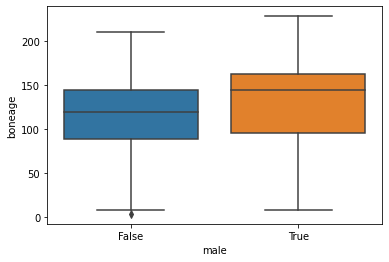

In [ ]:
sns.boxplot(y='boneage',x='male',data=final)

In [ ]:
q1=final['boneage'].quantile(0.25)
q3=final['boneage'].quantile(0.75)
iqr=q3-q1
print(iqr)

62.0


Detection and removal of outliers

In [ ]:
def cap_data(df):
    for col in df.columns[3:0]:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

cap_data(data)

,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1377,180,False,0.0,-1352.0,-604.0,424.0,44.0,-608.0,-528.0,-174.0,28.0,68.0,-14.0,-76.0,22.0,470.0,1084.0,818.0,-480.0,-1232.0,-758.0,-86.0,140.0,128.0,62.0,18.0,56.0,96.0,60.0,28.0,66.0,108.0,84.0,0.0,-122.0,-1464.0,-458.0,950.0,550.0,...,162.0,202.0,222.0,120.0,44.0,96.0,120.0,0.0,0.0,-3736.0,-2874.0,-608.0,-4.0,-162.0,284.0,2254.0,4862.0,5118.0,2272.0,-402.0,-326.0,1058.0,844.0,-1616.0,-4388.0,-5244.0,-3714.0,-1394.0,-18.0,288.0,218.0,110.0,68.0,132.0,148.0,36.0,-26.0,52.0,100.0,0.0
1,1378,12,False,0.0,16.0,40.0,18.0,-28.0,-32.0,-12.0,-2.0,0.0,2.0,6.0,6.0,10.0,30.0,42.0,26.0,6.0,0.0,-6.0,-18.0,-18.0,-16.0,-30.0,-30.0,-10.0,14.0,42.0,28.0,-22.0,-14.0,24.0,0.0,0.0,16.0,42.0,30.0,-2.0,...,-298.0,-306.0,-228.0,-54.0,72.0,76.0,34.0,18.0,0.0,6.0,6.0,0.0,-20.0,-106.0,-294.0,-380.0,-102.0,280.0,314.0,130.0,90.0,114.0,-34.0,-218.0,-182.0,22.0,160.0,130.0,34.0,-10.0,0.0,16.0,8.0,-20.0,-28.0,-2.0,8.0,-12.0,-18.0,0.0
2,1379,94,False,0.0,2432.0,4390.0,4246.0,2276.0,622.0,36.0,-100.0,-116.0,-36.0,32.0,28.0,6.0,0.0,0.0,8.0,24.0,30.0,26.0,20.0,12.0,10.0,22.0,36.0,-98.0,-920.0,-2808.0,-4500.0,-4072.0,-2022.0,-474.0,0.0,38.0,2418.0,4262.0,3976.0,1888.0,...,-850.0,-930.0,-1152.0,-1296.0,-1064.0,-566.0,-172.0,-4.0,0.0,608.0,956.0,790.0,328.0,14.0,-46.0,-14.0,8.0,118.0,356.0,436.0,216.0,36.0,68.0,2.0,-328.0,-592.0,-488.0,-202.0,-34.0,0.0,6.0,18.0,12.0,-108.0,-446.0,-806.0,-810.0,-470.0,-146.0,0.0
3,1380,120,True,0.0,68.0,444.0,572.0,-32.0,-666.0,-656.0,-396.0,-254.0,-136.0,-50.0,-34.0,-44.0,-74.0,-96.0,-56.0,16.0,50.0,56.0,56.0,18.0,-66.0,-158.0,-206.0,-200.0,-226.0,-200.0,178.0,584.0,312.0,-162.0,0.0,318.0,666.0,1382.0,1576.0,634.0,...,-124.0,-148.0,136.0,704.0,774.0,108.0,-324.0,22.0,0.0,-140.0,-258.0,-316.0,-116.0,1064.0,3394.0,4802.0,3196.0,152.0,-1128.0,-144.0,1060.0,358.0,-2340.0,-4538.0,-4132.0,-2024.0,-342.0,184.0,110.0,-40.0,-144.0,-192.0,-244.0,-278.0,20.0,610.0,712.0,88.0,-330.0,0.0
4,1381,82,False,0.0,-54.0,-76.0,-56.0,-20.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-16.0,-24.0,0.0,12.0,0.0,-6.0,-2.0,16.0,48.0,48.0,16.0,0.0,0.0,0.0,0.0,-14.0,-56.0,-60.0,-38.0,-14.0,...,-30.0,-26.0,6.0,36.0,38.0,48.0,56.0,32.0,0.0,-24.0,-22.0,6.0,34.0,36.0,10.0,-16.0,-22.0,-18.0,-22.0,-42.0,-56.0,-38.0,-16.0,-20.0,-34.0,-48.0,-50.0,-26.0,0.0,12.0,28.0,42.0,22.0,-6.0,12.0,40.0,36.0,32.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15605,50,False,0.0,518.0,1016.0,938.0,348.0,-56.0,-122.0,-134.0,-156.0,-124.0,-74.0,-56.0,-52.0,-78.0,-122.0,-20.0,188.0,158.0,-134.0,-306.0,-220.0,-90.0,-50.0,-58.0,-54.0,-28.0,-14.0,-32.0,-48.0,-32.0,-8.0,0.0,822.0,1276.0,1530.0,1144.0,380.0,...,-124.0,76.0,74.0,66.0,34.0,28.0,48.0,34.0,0.0,-96.0,-120.0,-114.0,-146.0,-188.0,-188.0,116.0,1430.0,3720.0,5576.0,5720.0,3834.0,1016.0,-472.0,148.0,964.0,-312.0,-3218.0,-5170.0,-5356.0,-4612.0,-3074.0,-1234.0,-194.0,18.0,24.0,18.0,-10.0,-4.0,22.0,0.0
496,15606,113,False,0.0,-90.0,-94.0,-52.0,-28.0,-28.0,-36.0,-36.0,-28.0,-26.0,-32.0,-30.0,6.0,80.0,126.0,78.0,-4.0,-30.0,-14.0,-4.0,-4.0,0.0,12.0,28.0,28.0,0.0,-14.0,24.0,66.0,62.0,32.0,0.0,-54.0,-144.0,-158.0,-126.0,-100.0,...,-44.0,166.0,172.0,166.0,152.0,186.0,230.0,218.0,0.0,-44.0,-38.0,-28.0,-44.0,-66.0,-90.0,-88.0,344.0,1944.0,4354.0,5770.0,5028.0,2742.0,670.0,228.0,700.0,26.0,-2186.0,-4326.0,-5264.0,-4862.0,-3218.0,-1278.0,-220.0,-2.0,0.0,-6.0,-14.0,12.0,32.0,0.0
497,15608,55,False,0.0,-396.0,-374.0,-160.0,52.0,296.0,396.0,18

In [ ]:
final.shape

(500, 1027)

Applying label encoding

In [ ]:
le = LabelEncoder()
final['male'] = le.fit_transform(final['male'])
final.head()

,id,boneage,male,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1377,180,0,0.0,-1352.0,-604.0,424.0,44.0,-608.0,-528.0,-174.0,28.0,68.0,-14.0,-76.0,22.0,470.0,1084.0,818.0,-480.0,-1232.0,-758.0,-86.0,140.0,128.0,62.0,18.0,56.0,96.0,60.0,28.0,66.0,108.0,84.0,0.0,-122.0,-1464.0,-458.0,950.0,550.0,...,162.0,202.0,222.0,120.0,44.0,96.0,120.0,0.0,0.0,-3736.0,-2874.0,-608.0,-4.0,-162.0,284.0,2254.0,4862.0,5118.0,2272.0,-402.0,-326.0,1058.0,844.0,-1616.0,-4388.0,-5244.0,-3714.0,-1394.0,-18.0,288.0,218.0,110.0,68.0,132.0,148.0,36.0,-26.0,52.0,100.0,0.0
1,1378,12,0,0.0,16.0,40.0,18.0,-28.0,-32.0,-12.0,-2.0,0.0,2.0,6.0,6.0,10.0,30.0,42.0,26.0,6.0,0.0,-6.0,-18.0,-18.0,-16.0,-30.0,-30.0,-10.0,14.0,42.0,28.0,-22.0,-14.0,24.0,0.0,0.0,16.0,42.0,30.0,-2.0,...,-298.0,-306.0,-228.0,-54.0,72.0,76.0,34.0,18.0,0.0,6.0,6.0,0.0,-20.0,-106.0,-294.0,-380.0,-102.0,280.0,314.0,130.0,90.0,114.0,-34.0,-218.0,-182.0,22.0,160.0,130.0,34.0,-10.0,0.0,16.0,8.0,-20.0,-28.0,-2.0,8.0,-12.0,-18.0,0.0
2,1379,94,0,0.0,2432.0,4390.0,4246.0,2276.0,622.0,36.0,-100.0,-116.0,-36.0,32.0,28.0,6.0,0.0,0.0,8.0,24.0,30.0,26.0,20.0,12.0,10.0,22.0,36.0,-98.0,-920.0,-2808.0,-4500.0,-4072.0,-2022.0,-474.0,0.0,38.0,2418.0,4262.0,3976.0,1888.0,...,-850.0,-930.0,-1152.0,-1296.0,-1064.0,-566.0,-172.0,-4.0,0.0,608.0,956.0,790.0,328.0,14.0,-46.0,-14.0,8.0,118.0,356.0,436.0,216.0,36.0,68.0,2.0,-328.0,-592.0,-488.0,-202.0,-34.0,0.0,6.0,18.0,12.0,-108.0,-446.0,-806.0,-810.0,-470.0,-146.0,0.0
3,1380,120,1,0.0,68.0,444.0,572.0,-32.0,-666.0,-656.0,-396.0,-254.0,-136.0,-50.0,-34.0,-44.0,-74.0,-96.0,-56.0,16.0,50.0,56.0,56.0,18.0,-66.0,-158.0,-206.0,-200.0,-226.0,-200.0,178.0,584.0,312.0,-162.0,0.0,318.0,666.0,1382.0,1576.0,634.0,...,-124.0,-148.0,136.0,704.0,774.0,108.0,-324.0,22.0,0.0,-140.0,-258.0,-316.0,-116.0,1064.0,3394.0,4802.0,3196.0,152.0,-1128.0,-144.0,1060.0,358.0,-2340.0,-4538.0,-4132.0,-2024.0,-342.0,184.0,110.0,-40.0,-144.0,-192.0,-244.0,-278.0,20.0,610.0,712.0,88.0,-330.0,0.0
4,1381,82,0,0.0,-54.0,-76.0,-56.0,-20.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-16.0,-24.0,0.0,12.0,0.0,-6.0,-2.0,16.0,48.0,48.0,16.0,0.0,0.0,0.0,0.0,-14.0,-56.0,-60.0,-38.0,-14.0,...,-30.0,-26.0,6.0,36.0,38.0,48.0,56.0,32.0,0.0,-24.0,-22.0,6.0,34.0,36.0,10.0,-16.0,-22.0,-18.0,-22.0,-42.0,-56.0,-38.0,-16.0,-20.0,-34.0,-48.0,-50.0,-26.0,0.0,12.0,28.0,42.0,22.0,-6.0,12.0,40.0,36.0,32.0,28.0,0.0


In [ ]:
print(final.columns[3:].values.tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
scaled_features = final.copy()

col_names = final.columns[3:].values.tolist()
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
print(scaled_features)

        id  boneage  male    1  ...      1021      1022      1023  1024
0     1377      180     0  0.0  ...  0.012486  0.066922  0.109246   0.0
1     1378       12     0  0.0  ...  0.075324 -0.023804 -0.077289   0.0
2     1379       94     0  0.0  ... -1.436479 -0.673068 -0.279632   0.0
3     1380      120     1  0.0  ...  1.376435  0.117956 -0.570500   0.0
4     1381       82     0  0.0  ...  0.127073  0.038570 -0.004572   0.0
..     ...      ...   ...  ...  ...       ...       ...       ...   ...
495  15605       50     0  0.0  ...  0.042057 -0.012464 -0.014057   0.0
496  15606      113     0  0.0  ...  0.034664  0.010218  0.001752   0.0
497  15608       55     0  0.0  ...  0.178821  0.126462  0.055499   0.0
498  15609      150     1  0.0  ...  0.130769  0.100945  0.061822   0.0
499  15610      132     1  0.0  ...  0.186214  0.160484  0.134539   0.0

[500 rows x 1027 columns]


Splitting the train and test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Initially trying to predict the gender of the person - classification


In [ ]:
x = scaled_features.drop(columns = ['male','boneage','id'], axis = 1)
y = scaled_features['male']

In [ ]:
print(x.shape)
print(y.shape)

(500, 1024)
(500,)


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state=32)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(350, 1024)
(150, 1024)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(350,)
(150,)


In [ ]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
102,0.0,0.023997,0.015584,0.028362,0.064772,0.091862,0.088442,0.058868,0.017765,0.076764,0.173610,0.121423,-0.079768,-0.151119,-0.111903,0.007744,0.169614,0.259260,0.217452,0.103557,0.002076,-0.050269,-0.044911,0.006813,0.074497,0.092034,0.055552,0.005148,-0.066603,-0.138276,-0.117220,0.0,-0.120802,-0.100429,-0.135861,-0.155952,-0.132063,-0.111799,-0.116700,-0.145605,...,-0.119275,-0.146255,-0.132153,-0.092501,-0.059597,-0.052198,-0.059518,-0.089411,0.0,0.007543,-0.072184,-0.171954,-0.226727,-0.287457,-0.374996,-0.486450,-0.602959,-0.687503,-0.687763,-0.605245,-0.425975,-0.198185,0.076147,0.371055,0.601097,0.714858,0.721535,0.655851,0.528030,0.392032,0.296240,0.260659,0.276403,0.217214,0.123397,0.101532,0.075324,0.030065,0.004913,0.0
38,0.0,0.015334,-0.019142,-0.024552,0.031163,0.062639,0.065525,0.108982,0.162414,0.221440,0.006880,-0.365749,-0.310360,-0.064743,0.003872,0.007744,0.145839,0.285847,0.237640,0.103557,-0.088735,-0.248086,-0.102961,0.149737,0.201257,0.061770,-0.088179,-0.109167,-0.034596,0.015222,-0.006749,0.0,-0.035490,-0.045832,-0.090368,-0.108927,-0.078180,-0.068615,-0.076359,-0.068647,...,-0.062693,-0.049154,0.007026,0.110725,0.103917,-0.007480,-0.092503,-0.143058,0.0,0.028577,-0.062212,-0.205627,-0.280786,-0.311804,-0.378582,-0.493580,-0.612553,-0.685375,-0.673090,-0.603283,-0.440253,-0.203598,0.082845,0.391056,0.640602,0.758135,0.743757,0.641119,0.502967,0.418510,0.354659,0.208025,0.009520,-0.118511,-0.018711,0.156404,0.127073,0.013053,-0.045673,0.0
86,0.0,0.151057,0.565859,1.189549,1.318401,0.814104,0.299279,0.264893,0.293912,0.340586,0.375442,0.365009,0.084940,-0.117898,-0.118335,-0.023483,0.042812,-0.024336,-0.267075,-0.491732,-0.413060,-0.143359,-0.044911,-0.120231,-0.331135,-0.306448,-0.036276,-0.285835,-1.261530,-2.035677,-1.407729,0.0,-0.079617,0.001485,0.201121,0.528723,0.558055,0.205604,-0.029296,-0.066242,...,0.649725,0.973097,-0.257414,-2.542203,-3.713030,-2.847060,-1.539735,-0.206765,0.0,0.010547,0.092346,0.726851,1.333603,0.845763,-0.104265,-0.495007,-0.586168,-0.663031,-0.688741,-0.656255,-0.444332,0.228382,1.280668,1.654307,1.158024,0.789442,0.774675,0.450735,-0.527417,-1.576125,-1.977246,-1.156960,0.950889,2.897223,2.195801,-0.995899,-2.985245,-2.666220,-1.756104,0.0
364,0.0,-0.056859,-0.075238,-0.062769,-0.002447,0.154485,0.798871,2.831856,5.001559,4.034093,-1.133908,-4.594400,-4.395127,-3.300550,-2.131535,-0.890054,0.074512,0.312435,0.237640,0.103557,0.002076,-0.050269,-0.044911,-0.017008,-0.014235,0.001241,0.055552,0.088285,0.096988,0.126081,0.123808,0.0,-0.164929,-0.129547,-0.117327,-0.078832,0.062745,0.352430,1.062129,2.682614,...,0.091622,0.047946,0.054347,0.113472,0.096595,0.010814,-0.047148,-0.116234,0.0,-0.019502,-0.047255,0.698358,3.255144,5.945253,4.964310,1.779722,-0.052457,-0.245938,-0.676025,-2.118866,-3.469165,-3.468890,-2.029253,-0.361631,0.487399,0.719462,0.729264,0.661517,0.533600,0.399093,0.298674,0.218552,0.130831,0.026198,0.058264,0.191322,0.160340,0.055581,0.011236,0.0
269,0.0,0.353198,0.811613,1.245403,1.160437,0.693035,0.262611,0.125687,0.004616,-0.110465,-0.159851,-0.336519,-0.343302,0.014990,0.312606,0.117042,-0.400997,-0.494043,-0.317547,-0.308566,-0.231438,0.054458,0.138913,-0.040829,-0.248741,-0.311492,0.742264,3.438047,4.912258,0.804029,-4.581276,0.0,-0.088442,0.199853,0.650991,1.305565,1.654370,1.524877,1.373645,1.381537,...,-0.039546,0.018276,0.082182,0.135442,0.167370,0.165293,0.156948,0.165416,0.0,0.049612,-0.017341,-0.182315,-0.445419,-0.688068,-0.645726,-0.480745,-0.471030,-0.600254,-0.673090,-0.617016,-0.435154,-0.211176,0.016982,0.263678,0.522087,0.717620,0.792067,0.768042,0.667271,0.520889,0.335186,0.130828,0.043487,0.066717,0.099712,0.161392,0.186214,0.151979,

In [ ]:
y_train.head()

102    0
38     1
86     0
364    1
269    1
Name: male, dtype: int64

In [ ]:
import math

k = math.floor(math.sqrt(x_train.shape[0]))
k

18

In [ ]:
scores = {}
scores_list = []

k_range = range(1, 51)

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
scores

{1: 0.49333333333333335,
 2: 0.49333333333333335,
 3: 0.4866666666666667,
 4: 0.5066666666666667,
 5: 0.4866666666666667,
 6: 0.5,
 7: 0.5066666666666667,
 8: 0.47333333333333333,
 9: 0.5,
 10: 0.48,
 11: 0.49333333333333335,
 12: 0.49333333333333335,
 13: 0.52,
 14: 0.52,
 15: 0.5,
 16: 0.48,
 17: 0.46,
 18: 0.4866666666666667,
 19: 0.49333333333333335,
 20: 0.5,
 21: 0.48,
 22: 0.49333333333333335,
 23: 0.4866666666666667,
 24: 0.49333333333333335,
 25: 0.5066666666666667,
 26: 0.49333333333333335,
 27: 0.5133333333333333,
 28: 0.49333333333333335,
 29: 0.5,
 30: 0.5066666666666667,
 31: 0.54,
 32: 0.5333333333333333,
 33: 0.5666666666666667,
 34: 0.54,
 35: 0.5933333333333334,
 36: 0.5466666666666666,
 37: 0.58,
 38: 0.6,
 39: 0.5933333333333334,
 40: 0.56,
 41: 0.58,
 42: 0.5866666666666667,
 43: 0.58,
 44: 0.58,
 45: 0.5733333333333334,
 46: 0.5866666666666667,
 47: 0.5933333333333334,
 48: 0.6,
 49: 0.5933333333333334,
 50: 0.5866666666666667}

In [ ]:
final_k = 1

for i in scores:
  if scores[i] > scores[final_k]:
    final_k = i

final_k

38

In [ ]:
knn = KNeighborsClassifier(n_neighbors = final_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6

In [ ]:
test_img_path = '/content/drive/MyDrive/ML Project/archive_6/boneage-test-dataset/boneage-test-dataset/4369.png'

In [ ]:
image = cv2.imread(test_img_path)

In [ ]:
test_img_features = [int(11175)]
x = list(extract_features(test_img_path))

for i in x:
  test_img_features.append(i)

test_img_features = pd.DataFrame(test_img_features)
test_img_features = test_img_features.transpose()

In [ ]:
test_img_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,11175.0,0.0,92.0,568.0,1100.0,1512.0,2556.0,3060.0,814.0,-2060.0,-2356.0,-1128.0,-380.0,-118.0,250.0,604.0,304.0,-438.0,-612.0,-158.0,80.0,-86.0,-194.0,-124.0,-80.0,100.0,620.0,516.0,-890.0,-1898.0,-1264.0,-292.0,0.0,-34.0,68.0,544.0,1122.0,1712.0,2914.0,3238.0,...,60.0,-312.0,-870.0,-1224.0,-968.0,-408.0,-72.0,0.0,0.0,0.0,226.0,722.0,1154.0,1114.0,698.0,288.0,-2.0,36.0,1082.0,2818.0,3262.0,1816.0,538.0,592.0,518.0,-970.0,-2882.0,-3440.0,-2310.0,-748.0,50.0,92.0,-118.0,-480.0,-1012.0,-1312.0,-1010.0,-428.0,-78.0,0.0


In [ ]:
test_img_features = test_img_features.iloc[:,1:]

In [ ]:
test_img_features.shape

(1, 1024)

In [ ]:
y_predict = knn.predict(test_img_features)

In [ ]:
y_predict[0]

1

Trying to predict the boneage - regression

In [ ]:
x = scaled_features.drop(columns = ['male','boneage','id'], axis = 1)
y = scaled_features['boneage']


In [ ]:
print(x.shape)
print(y.shape)

(500, 1024)
(500,)


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state=32)

In [ ]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
102,0.0,0.023997,0.015584,0.028362,0.064772,0.091862,0.088442,0.058868,0.017765,0.076764,0.173610,0.121423,-0.079768,-0.151119,-0.111903,0.007744,0.169614,0.259260,0.217452,0.103557,0.002076,-0.050269,-0.044911,0.006813,0.074497,0.092034,0.055552,0.005148,-0.066603,-0.138276,-0.117220,0.0,-0.120802,-0.100429,-0.135861,-0.155952,-0.132063,-0.111799,-0.116700,-0.145605,...,-0.119275,-0.146255,-0.132153,-0.092501,-0.059597,-0.052198,-0.059518,-0.089411,0.0,0.007543,-0.072184,-0.171954,-0.226727,-0.287457,-0.374996,-0.486450,-0.602959,-0.687503,-0.687763,-0.605245,-0.425975,-0.198185,0.076147,0.371055,0.601097,0.714858,0.721535,0.655851,0.528030,0.392032,0.296240,0.260659,0.276403,0.217214,0.123397,0.101532,0.075324,0.030065,0.004913,0.0
38,0.0,0.015334,-0.019142,-0.024552,0.031163,0.062639,0.065525,0.108982,0.162414,0.221440,0.006880,-0.365749,-0.310360,-0.064743,0.003872,0.007744,0.145839,0.285847,0.237640,0.103557,-0.088735,-0.248086,-0.102961,0.149737,0.201257,0.061770,-0.088179,-0.109167,-0.034596,0.015222,-0.006749,0.0,-0.035490,-0.045832,-0.090368,-0.108927,-0.078180,-0.068615,-0.076359,-0.068647,...,-0.062693,-0.049154,0.007026,0.110725,0.103917,-0.007480,-0.092503,-0.143058,0.0,0.028577,-0.062212,-0.205627,-0.280786,-0.311804,-0.378582,-0.493580,-0.612553,-0.685375,-0.673090,-0.603283,-0.440253,-0.203598,0.082845,0.391056,0.640602,0.758135,0.743757,0.641119,0.502967,0.418510,0.354659,0.208025,0.009520,-0.118511,-0.018711,0.156404,0.127073,0.013053,-0.045673,0.0
86,0.0,0.151057,0.565859,1.189549,1.318401,0.814104,0.299279,0.264893,0.293912,0.340586,0.375442,0.365009,0.084940,-0.117898,-0.118335,-0.023483,0.042812,-0.024336,-0.267075,-0.491732,-0.413060,-0.143359,-0.044911,-0.120231,-0.331135,-0.306448,-0.036276,-0.285835,-1.261530,-2.035677,-1.407729,0.0,-0.079617,0.001485,0.201121,0.528723,0.558055,0.205604,-0.029296,-0.066242,...,0.649725,0.973097,-0.257414,-2.542203,-3.713030,-2.847060,-1.539735,-0.206765,0.0,0.010547,0.092346,0.726851,1.333603,0.845763,-0.104265,-0.495007,-0.586168,-0.663031,-0.688741,-0.656255,-0.444332,0.228382,1.280668,1.654307,1.158024,0.789442,0.774675,0.450735,-0.527417,-1.576125,-1.977246,-1.156960,0.950889,2.897223,2.195801,-0.995899,-2.985245,-2.666220,-1.756104,0.0
364,0.0,-0.056859,-0.075238,-0.062769,-0.002447,0.154485,0.798871,2.831856,5.001559,4.034093,-1.133908,-4.594400,-4.395127,-3.300550,-2.131535,-0.890054,0.074512,0.312435,0.237640,0.103557,0.002076,-0.050269,-0.044911,-0.017008,-0.014235,0.001241,0.055552,0.088285,0.096988,0.126081,0.123808,0.0,-0.164929,-0.129547,-0.117327,-0.078832,0.062745,0.352430,1.062129,2.682614,...,0.091622,0.047946,0.054347,0.113472,0.096595,0.010814,-0.047148,-0.116234,0.0,-0.019502,-0.047255,0.698358,3.255144,5.945253,4.964310,1.779722,-0.052457,-0.245938,-0.676025,-2.118866,-3.469165,-3.468890,-2.029253,-0.361631,0.487399,0.719462,0.729264,0.661517,0.533600,0.399093,0.298674,0.218552,0.130831,0.026198,0.058264,0.191322,0.160340,0.055581,0.011236,0.0
269,0.0,0.353198,0.811613,1.245403,1.160437,0.693035,0.262611,0.125687,0.004616,-0.110465,-0.159851,-0.336519,-0.343302,0.014990,0.312606,0.117042,-0.400997,-0.494043,-0.317547,-0.308566,-0.231438,0.054458,0.138913,-0.040829,-0.248741,-0.311492,0.742264,3.438047,4.912258,0.804029,-4.581276,0.0,-0.088442,0.199853,0.650991,1.305565,1.654370,1.524877,1.373645,1.381537,...,-0.039546,0.018276,0.082182,0.135442,0.167370,0.165293,0.156948,0.165416,0.0,0.049612,-0.017341,-0.182315,-0.445419,-0.688068,-0.645726,-0.480745,-0.471030,-0.600254,-0.673090,-0.617016,-0.435154,-0.211176,0.016982,0.263678,0.522087,0.717620,0.792067,0.768042,0.667271,0.520889,0.335186,0.130828,0.043487,0.066717,0.099712,0.161392,0.186214,0.151979,

In [ ]:
import math

k = math.floor(math.sqrt(x_train.shape[0]))
k

18

In [ ]:
scores = {}
scores_list = []

k_range = range(1, 51)

for k in k_range:
  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores[k] = math.sqrt(mean_squared_error(y_test, y_pred))
  scores_list.append(math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
scores

{1: 54.41304990533062,
 2: 49.26119162180306,
 3: 46.267571236754456,
 4: 45.57727412501396,
 5: 44.62268780190932,
 6: 44.277349781843355,
 7: 44.76527596220969,
 8: 44.82084475999978,
 9: 45.023380300267895,
 10: 44.8127950478432,
 11: 44.730580685755115,
 12: 44.93332354516873,
 13: 44.46552994238569,
 14: 44.14753673762558,
 15: 43.92211186988976,
 16: 43.977369298500186,
 17: 43.833567214676386,
 18: 43.92675253734752,
 19: 43.81778921731321,
 20: 43.908383026479115,
 21: 43.85790582381002,
 22: 43.827445738943084,
 23: 43.93002541491709,
 24: 44.01128971849365,
 25: 43.99763533039778,
 26: 43.973887603065315,
 27: 43.68390449192709,
 28: 43.63964176449359,
 29: 43.49480759530586,
 30: 43.30393806401275,
 31: 43.23777686925188,
 32: 43.1012975321896,
 33: 43.189242884645275,
 34: 43.34937523579011,
 35: 43.39143568904424,
 36: 43.35349275850955,
 37: 43.22770576721888,
 38: 43.125109391379716,
 39: 43.0926202067494,
 40: 43.179354586422434,
 41: 43.18460683736508,
 42: 43.13351479

In [ ]:
final_k = 1

for i in scores:
  if scores[i] < scores[final_k]:
    final_k = i

final_k

50

In [ ]:
knn = KNeighborsRegressor(n_neighbors = final_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1853.1738319999997

In [ ]:
rmse = math.sqrt(mse)
rmse

43.048505572203084

In [ ]:
test_img_path = '/content/drive/MyDrive/ML Project/archive_6/boneage-test-dataset/boneage-test-dataset/4369.png'

In [ ]:
image = cv2.imread(test_img_path)

In [ ]:
test_img_features = [int(11175)]
x = list(extract_features(test_img_path))

for i in x:
  test_img_features.append(i)

test_img_features = pd.DataFrame(test_img_features)
test_img_features = test_img_features.transpose()

In [ ]:
test_img_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,11175.0,0.0,92.0,568.0,1100.0,1512.0,2556.0,3060.0,814.0,-2060.0,-2356.0,-1128.0,-380.0,-118.0,250.0,604.0,304.0,-438.0,-612.0,-158.0,80.0,-86.0,-194.0,-124.0,-80.0,100.0,620.0,516.0,-890.0,-1898.0,-1264.0,-292.0,0.0,-34.0,68.0,544.0,1122.0,1712.0,2914.0,3238.0,...,60.0,-312.0,-870.0,-1224.0,-968.0,-408.0,-72.0,0.0,0.0,0.0,226.0,722.0,1154.0,1114.0,698.0,288.0,-2.0,36.0,1082.0,2818.0,3262.0,1816.0,538.0,592.0,518.0,-970.0,-2882.0,-3440.0,-2310.0,-748.0,50.0,92.0,-118.0,-480.0,-1012.0,-1312.0,-1010.0,-428.0,-78.0,0.0


In [ ]:
test_img_features = test_img_features.drop(columns = [0])

In [ ]:
test_img_features.shape

(1, 1024)

In [ ]:
y_predict = knn.predict(test_img_features)

In [ ]:
y_predict[0]

134.7

SVM Classification
---
------------

In [ ]:
x = scaled_features.drop(columns = ['id','male','boneage'], axis = 1)
y = scaled_features['male']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state=32)

SVM Kernels:


*   Linear Kernel
*   Polynomial Kernel
*   Radial Basis Function Kernel

Note: Default will be RBF



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

Trained Using Linear Kernel

In [ ]:
# Linear Kernel
clf_1 = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf_1.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred_1 = clf_1.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.52


In [ ]:
y_predict = clf_1.predict(test_img_features)

In [ ]:
y_predict[0]

1

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_1))

Confusion Matrix: 
 [[33 38]
 [34 45]]


In [ ]:
print("Report : \n",classification_report(y_test, y_pred_1))

Report : 
               precision    recall  f1-score   support

           0       0.49      0.46      0.48        71
           1       0.54      0.57      0.56        79

    accuracy                           0.52       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.52      0.52      0.52       150



Trained Using Polynomial Kernel

In [ ]:
# Polynomial Kernel
clf_2 = svm.SVC(kernel='poly') 
#Train the model using the training sets
clf_2.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred_2 = clf_2.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.56


In [ ]:
y_predict = clf_2.predict(test_img_features)

In [ ]:
y_predict[0]

0

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_2))

Confusion Matrix: 
 [[ 6 65]
 [ 1 78]]


In [ ]:
print("Report : \n",classification_report(y_test, y_pred_2))

Report : 
               precision    recall  f1-score   support

           0       0.86      0.08      0.15        71
           1       0.55      0.99      0.70        79

    accuracy                           0.56       150
   macro avg       0.70      0.54      0.43       150
weighted avg       0.69      0.56      0.44       150



Trained Using RBF

In [ ]:
#Radial Basis Function Kernel
clf_3 = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf_3.fit(x_train, y_train)
#Predicting the response for test dataset
y_pred_3 = clf_3.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.58


In [ ]:
y_predict = clf_3.predict(test_img_features)

In [ ]:
y_predict[0]

0

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_3))

Confusion Matrix: 
 [[25 46]
 [17 62]]


In [ ]:
print("Report : \n",classification_report(y_test, y_pred_3))

Report : 
               precision    recall  f1-score   support

           0       0.60      0.35      0.44        71
           1       0.57      0.78      0.66        79

    accuracy                           0.58       150
   macro avg       0.58      0.57      0.55       150
weighted avg       0.58      0.58      0.56       150



SVM Regression
---
----------

In [ ]:
x_reg = final.drop(columns = ['id','male','boneage'], axis = 1)
y_reg = final['boneage']

In [ ]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg= train_test_split(x_reg, y_reg, test_size = 0.3,random_state=32)

In [ ]:
print(x_train_reg.shape)
print(x_test_reg.shape)

(350, 1024)
(150, 1024)


In [ ]:
print(y_train_reg.shape)
print(y_test_reg.shape)

(350,)
(150,)


In [ ]:
x_train_reg.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
102,0.0,-4.0,-2.0,2.0,4.0,0.0,-12.0,-26.0,-24.0,0.0,24.0,24.0,8.0,0.0,0.0,2.0,6.0,6.0,2.0,0.0,0.0,0.0,0.0,6.0,28.0,46.0,30.0,-10.0,-44.0,-42.0,-14.0,0.0,-30.0,-46.0,-50.0,-42.0,-32.0,-36.0,-54.0,-66.0,...,-136.0,-132.0,-120.0,-102.0,-68.0,-8.0,40.0,32.0,0.0,-18.0,-18.0,-6.0,2.0,8.0,14.0,16.0,16.0,6.0,-8.0,2.0,14.0,-8.0,-38.0,-40.0,-26.0,-20.0,-16.0,-10.0,-8.0,-8.0,4.0,42.0,72.0,54.0,20.0,6.0,8.0,26.0,34.0,0.0
38,0.0,-10.0,-28.0,-34.0,-16.0,-14.0,-22.0,-8.0,20.0,34.0,-14.0,-76.0,-48.0,26.0,36.0,2.0,0.0,12.0,6.0,0.0,-14.0,-34.0,-12.0,42.0,68.0,34.0,-42.0,-76.0,-26.0,30.0,30.0,0.0,28.0,14.0,4.0,8.0,20.0,4.0,-18.0,-2.0,...,-92.0,-60.0,-20.0,46.0,66.0,36.0,8.0,0.0,0.0,-4.0,-10.0,-32.0,-42.0,-14.0,10.0,6.0,0.0,10.0,22.0,6.0,-14.0,-18.0,-26.0,-2.0,56.0,74.0,30.0,-36.0,-44.0,22.0,52.0,12.0,-38.0,-62.0,-28.0,28.0,36.0,14.0,2.0,0.0
86,0.0,84.0,410.0,792.0,750.0,346.0,80.0,48.0,60.0,62.0,70.0,74.0,48.0,10.0,-2.0,-6.0,-26.0,-58.0,-94.0,-104.0,-64.0,-16.0,0.0,-26.0,-100.0,-112.0,-16.0,-178.0,-716.0,-932.0,-528.0,0.0,-2.0,66.0,350.0,686.0,634.0,258.0,24.0,0.0,...,462.0,698.0,-210.0,-1886.0,-3062.0,-2758.0,-1396.0,-38.0,0.0,-16.0,114.0,688.0,1272.0,1032.0,316.0,4.0,44.0,52.0,-10.0,-102.0,-22.0,780.0,2120.0,2398.0,1130.0,142.0,94.0,-372.0,-1524.0,-2238.0,-1864.0,-766.0,350.0,980.0,720.0,-434.0,-1648.0,-1876.0,-1080.0,0.0
364,0.0,-60.0,-70.0,-60.0,-36.0,30.0,298.0,970.0,1492.0,930.0,-274.0,-944.0,-1040.0,-948.0,-628.0,-228.0,-18.0,18.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,30.0,38.0,48.0,82.0,82.0,0.0,-60.0,-78.0,-28.0,40.0,156.0,394.0,998.0,2286.0,...,28.0,12.0,14.0,48.0,60.0,54.0,52.0,16.0,0.0,-36.0,2.0,666.0,2836.0,5640.0,5970.0,3194.0,934.0,836.0,16.0,-3084.0,-5954.0,-6050.0,-3810.0,-1432.0,-262.0,-10.0,0.0,0.0,0.0,0.0,6.0,18.0,12.0,-12.0,-2.0,42.0,54.0,44.0,38.0,0.0
269,0.0,224.0,594.0,830.0,656.0,288.0,64.0,-2.0,-28.0,-44.0,-52.0,-70.0,-56.0,50.0,132.0,30.0,-138.0,-164.0,-104.0,-72.0,-36.0,18.0,38.0,-6.0,-74.0,-114.0,374.0,1972.0,2756.0,400.0,-1792.0,0.0,-8.0,284.0,884.0,1512.0,1692.0,1480.0,1276.0,1204.0,...,-74.0,-10.0,34.0,64.0,118.0,206.0,250.0,184.0,0.0,10.0,26.0,-14.0,-176.0,-354.0,-288.0,24.0,236.0,170.0,22.0,-22.0,-4.0,-32.0,-144.0,-244.0,-190.0,-14.0,130.0,188.0,192.0,138.0,36.0,-32.0,-24.0,2.0,12.0,30.0,68.0,112.0,100.0,0.0


In [ ]:
# Polynomial Kernel
clf = svm.SVR(kernel='poly') 
#Train the model using the training sets
clf.fit(x_train_reg, y_train_reg)
#Predicting the response for test dataset
y_pred_reg = clf.predict(x_test_reg)

In [ ]:
y_predict_reg = clf.predict(test_img_features)

In [ ]:
y_predict_reg[0]

130.79927083673536

Random Forest (Classification)
---
----------

In [ ]:
x_rf = scaled_features.drop(columns = ['id','male','boneage'], axis = 1)
y_rf = scaled_features['male']

In [ ]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf= train_test_split(x_rf, y_rf, test_size = 0.3,random_state=32)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=5000)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(x_train_rf,y_train_rf)
y_pred_rf=clf_rf.predict(x_test_rf)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_rf, y_pred_rf))

Accuracy: 0.56


In [ ]:
y_predict_rf = clf_rf.predict(test_img_features)

In [ ]:
y_predict_rf[0]

0

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test_rf, y_pred_rf))

Confusion Matrix: 
 [[26 45]
 [21 58]]


In [ ]:
print("Report : \n",classification_report(y_test_rf, y_pred_rf))

Report : 
               precision    recall  f1-score   support

           0       0.55      0.37      0.44        71
           1       0.56      0.73      0.64        79

    accuracy                           0.56       150
   macro avg       0.56      0.55      0.54       150
weighted avg       0.56      0.56      0.54       150



Random Forest (Regression)
---
----------

In [ ]:
x_rf_1 = scaled_features.drop(columns = ['id','male','boneage'], axis = 1)
y_rf_1 = scaled_features['boneage']

In [ ]:
x_train_rf1, x_test_rf1, y_train_rf1, y_test_rf1= train_test_split(x_rf_1, y_rf_1, test_size = 0.3,random_state=32)

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train_rf1,y_train_rf1)  
y_pred_rf1=regressor.predict(x_test_rf1)

In [ ]:
y_predict_rf1 = regressor.predict(test_img_features)

In [ ]:
y_predict_rf1[0]

107.142

CNN (Convolutional Neural Networks) for Image Classification
---
------------------------

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path="/content/drive/MyDrive/ML/project/CNN_Train"
test_path="/content/drive/MyDrive/ML/project/CNN_Test"
val_path="/content/drive/MyDrive/ML/project/CNN_Val"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(32,32))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (32, 32),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (32, 32),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (32, 32),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 309 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Female': 0, 'Male': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((1000,), (309,), (200,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf

#create model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1843264   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,846,913
Trainable params: 1,846,913
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  batch_size=64,shuffle=True)

Epoch 1/20
16/16 [==============================] - 3s 97ms/step - loss: 0.7294 - accuracy: 0.5210 - val_loss: 0.6876 - val_accuracy: 0.5500
Epoch 2/20
16/16 [==============================] - 1s 84ms/step - loss: 0.6740 - accuracy: 0.5840 - val_loss: 0.7148 - val_accuracy: 0.5500
Epoch 3/20
16/16 [==============================] - 1s 84ms/step - loss: 0.6489 - accuracy: 0.6330 - val_loss: 0.7851 - val_accuracy: 0.5300
Epoch 4/20
16/16 [==============================] - 1s 84ms/step - loss: 0.6316 - accuracy: 0.6480 - val_loss: 0.8475 - val_accuracy: 0.5300
Epoch 5/20
16/16 [==============================] - 1s 84ms/step - loss: 0.6028 - accuracy: 0.6940 - val_loss: 0.9057 - val_accuracy: 0.5100
Epoch 6/20
16/16 [==============================] - 1s 85ms/step - loss: 0.5718 - accuracy: 0.7060 - val_loss: 1.0285 - val_accuracy: 0.5250
Epoch 7/20
16/16 [==============================] - 1s 84ms/step - loss: 0.5409 - accuracy: 0.7320 - val_loss: 1.0764 - val_accuracy: 0.5200
Epoch 8/20
16

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

10/10 [==============================] - 0s 12ms/step - loss: 0.7851 - accuracy: 0.7443


[0.7850539088249207, 0.7443365454673767]

Female


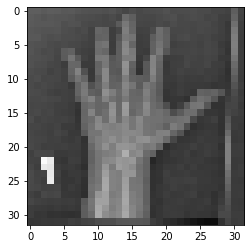

In [ ]:
path = '/content/drive/MyDrive/ML/project/1382.png'

img = image.load_img(path, target_size=(32, 32))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
if classes[0]<0.5:
  print("Female")
else:
  print("Male")

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       309
           1       0.00      0.00      0.00         0

    accuracy                           0.44       309
   macro avg       0.50      0.22      0.31       309
weighted avg       1.00      0.44      0.61       309

[[136 173]
 [  0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_save_name = 'gender_classifier.h5'
path = F"/content/drive/MyDrive/ML/project/{model_save_name}" 
model.save(path, model_save_name)

In [ ]:
model_new = keras.models.load_model(path)

In [ ]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1843264   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,846,913
Trainable params: 1,846,913
Non-trainable params: 0
______________________________________________